In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

from double_pendulum import DoublePendulum
from IPython.display import HTML

In [2]:
pendulum = DoublePendulum()
pendulum.SetAngles(85, 105)
pendulum

<double_pendulum.DoublePendulum with masses 1, 1, lengths 1, 1, and initial angles 1.48353, 1.8326 radians>

In [3]:
pendulum.Simulate(n_steps=300000, dt=0.0001, n_record=1000)

In [4]:
data = pendulum.data

## Animate the double pendulum

In [5]:
fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
ax.grid()
ax.set_aspect("equal")
xlim = data.x2.min() - 0.2, data.x2.max() + 0.2
ylim = data.y2.min() - 0.2, max(max(data.y2.max(), data.y1.max()), 0.2)
center_y = data.y1.min()
dist = 0.5 * max(xlim[1] - xlim[0], ylim[1] - ylim[0])
ax.set_xlim(-dist, dist)
ax.set_ylim(center_y - dist, center_y + dist)
line, = ax.plot([], [], 'o-', lw=4, markersize=24)
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    row = data.iloc[i]
    thisx = [0, row.x1, row.x2]
    thisy = [0, row.y1, row.y2]
    line.set_data(thisx, thisy)
    time_text.set_text(f"time = {data.index[i]:0.02f}")
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(data)),
                              interval=15, blit=True, init_func=init)
plt.close()

In [6]:
display(HTML(ani.to_jshtml(fps=20)))

## Plot energy over time

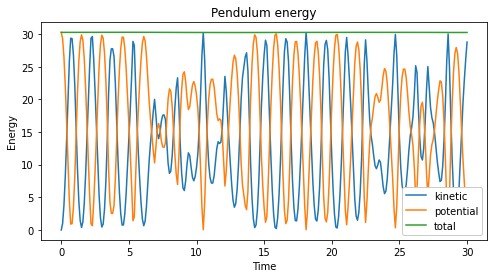

In [7]:
plt.figure(figsize=(8, 4))
plt.title("Pendulum energy")
plt.plot(data.ke, label="kinetic")
plt.plot(data.pe, label="potential")
plt.plot(data.ke + data.pe, label="total")
plt.xlabel("Time")
plt.ylabel("Energy")
plt.legend(loc="lower right", framealpha=1)
plt.show()

## Poincare plot of pendulum angles

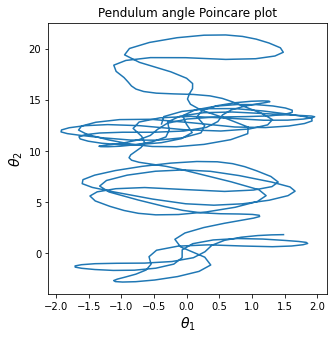

In [8]:
plt.figure(figsize=(5, 5))
plt.plot(data.th1, data.th2)
plt.xlabel(r"$\theta_1$", fontsize=14)
plt.ylabel(r"$\theta_2$", fontsize=14)
plt.title("Pendulum angle Poincare plot")
plt.show()